In [1]:
import numpy as np
from numpy import linalg as LA
from scipy.linalg import expm, sinm, cosm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from scipy import stats
%matplotlib inline

from IPython.display import Image, display, Math, Latex
sns.set(color_codes=True)

# Quantum Walks

Quantum walks are the quantum variation of the well known random walks heavily used in computer science in many of its fields, one pretty famous example is the *Page Rank* algorithm, which can be generally seen as a walker on web pages that wants to rank which pages are the most relevant within an specific set of pages. 

Then in constrast to the classical random walk, where the walker occupies definite states and the randomness arises due to stochastic transitions between states, in quantum walks randomness arises throughout some properties from quantum mechanics like quantum superposition of states, non-randomness, reversible unitary evolution and collapse of the wave function due to state measurements.

It is pretty used in randomized algorithms, and are part of several quantum algorithms, as the Grover's search algorithm, which can be seen as a quantum walk algorithm.

Mathematically we can see the Quantum Walks, or more specifically Continuous-Time Quantum Walks in graphs, like a transition operator from a initial state to a state $t$, which can be seen as $U(t) = U_H(t)$, defined by

$$
    U(t) = e^{itH}
$$

This formulation comes from a solution to the Schrödinger’s equation, where $t$ defines our time and $H$ describes our Hamiltonian, which in this work will be seen as the graph adjacency matrix $A$ or the graph Laplacian matrix $L$.

## Graph Theory and Linear Algebra Basics

To understand how the $U(t)$ operator works we must understand its matrix nature and how the function works over the hamiltonian A.

### Eigenvalues and Eigenvectors

Let $M$ be a symmetric matrix, we say that $v$ is a eigenvector and $\lambda$ a eigenvalue of $M$ if the following equation holds

$$
  Av = \lambda v
$$

In [21]:
#Let A be the adjacency matrix of G = C_3, i.e, the triangle graph
A = np.array([[0, 1, 1], 
              [1, 0, 1],
              [1, 1, 0]])

#Calculate the eigenvalues

#EIGENVALUES
lambd = np.array([-1, -1, 2])

#EIGENVECTORS
v = np.array([[-1, -1, 1],
              [ 1,  0, 1],
              [ 0,  1, 1]])

$$
   A = \begin{pmatrix}
        0 & 1 & 1\\
        1 & 0 & 1\\
        1 & 1 & 0
       \end{pmatrix}
$$

Then we have two eigenvalues, $\lambda_1 = -1$ with multiplicity two and $\lambda_2 = 2$ with multiplicity one, which give us the following:

$$
    \lambda_1 = -1 \Rightarrow v_1 = \begin{pmatrix}
                   -1\\
                    1\\
                    0 
                \end{pmatrix},\; \;
                                  v_2 = \begin{pmatrix}
                   -1\\
                    0\\
                    1 
                \end{pmatrix}\\
$$

$$
     \lambda_2 = 2 \Rightarrow v_3 = \begin{pmatrix}
                    1\\
                    1\\
                    1 
                \end{pmatrix}
$$

*A quick remark, the multiplicity of a eigenvalue is the dimension of its eigenspace.*

In [30]:
print(np.isclose(A@v[:,0],lambd[0]*v[:, 0])) #Av_0 = lambd_0 * v_0
print(np.isclose(A@v[:,1],lambd[1]*v[:, 1])) #Av_1 = lambd_1 * v_1
print(np.isclose(A@v[:,2],lambd[2]*v[:, 2])) #Av_2 = lambd_2 * v_2

[ True  True  True]
[ True  True  True]
[ True  True  True]


And this is known as the fundamental property of the eigenvectors.

And we say that $M_{nxn}$ is a diagonalizable matrix, if and only if, $M$ have a set of $n$ linearly independent eigenvector (i.e none of its eigenvectors can be written as a linear combination of others), and can be factorized as

$$
    M = PDP^{-1}
$$

Where the matrix $P$ is given by the eigenvectors of A as its columns and $D$ a diagonal matrix with the eigenvalues.

We can get this relation by the fundamental property of the eigenvectors,

$$
    Av = \lambda v\\
    AP = PD\\
    A = PDP^{-1}\\
$$



In [44]:
np.isclose(v@np.diag(lambd)@LA.inv(v), A) #A = PDP^-1

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

And we have that a function $f(M)$, where $M$ is symmetric and diagonalizable matrix can be seen as

$$
    f(M) = Pf(D)P^{-1}
$$

In [47]:
np.isclose(expm(A), v@np.diag(math.e**lambd)@LA.inv(v)) #exp(A) = Pexp(D)P^-1

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

Furthermore, let A be a matrix with distinct eigenvalues $\lambda_0, \lambda_1, \dots, \lambda_{n-1}$ and $E_0, E_1, \dots, E_{n-1}$ the orthogonal projections $E_i$ belonging to $\lambda_i$. Then $A$ can be written as

$$
    A = \sum_{i=0}^{n-1} \lambda_i E_i
$$

Which is called the Spectral Decomposition of A. And if $f$ is a analityc function applied on $A$, then $f(A)$ is defined in terms of a power series as

$$
   f(A) = \sum_{i=0}^{n-1} f(\lambda_i) E_i
$$

And as immediate consequence we get the following

$$
   U(t) = exp(itA) = \sum_{i=0}^{n-1} exp(it\lambda_i) E_i
$$

## Continuous-Time Quantum Walks

Finally we can define our continuous-time quantum walk by the unitary operator $U(t)$ on $G_n$ at time $t \geq 0$ as the following

$$
    U_{G_n}(t) = e^{-itA_{G_n}} \equiv \sum_{k = 0}^{\infty}\frac{(it)^k}{k!}A_{G_n}^k
$$

And given a state $|\psi_{G_n, t}\rangle$ is the probability amplitude of each vertice at time $t$ is given by 

$$
    |\psi_{Gn, t}\rangle = U_{G_n}(t)|\psi_{G_n, 0}\rangle
$$

Where the probability that the walker on $G_n$ is in position $x \in V(G)$ at time $t$ with initial state $|\psi_{G_n, 0}\rangle$ is

$$
    \mathcal{P}(x) = \big|U_{G_n}(t)|\psi_{G_n, 0}\rangle(x)\big|^2 
$$

## Example

Now let's see an example of how it work on cycle graph $C_n$ for some numbers of vertices.

In [4]:
#number of vertices
n = 200

#Define adjacency matrix A_Cn
A = np.zeros((n, n))
for i in range(n):
    j1 = (i - 1)%n
    j2 = (i + 1)%n
    A[i][j1] = 1
    A[i][j2] = 1
        

#Define degree matrix D
#Each vertex i \in V(G)
#will have degree(i) = 2
D = 2*np.eye(n)

#Define our initial state Psi_0
#with probability 1 that it will
#at the vertex y = ?
y = math.floor(n/2)
psi_0 = np.zeros(n)
psi_0[y] = 1

#Define the time t >= 0
t = 100

gamma = 1/(2*math.sqrt(2))

#Exponentiate or hamiltonian
H = expm(-(1j)*gamma*t*A)

#Compute Psi_t
psi_t = H @ psi_0

#Compute the probabilities
p_t = np.copy(psi_t)
p_t = abs(p_t)**2

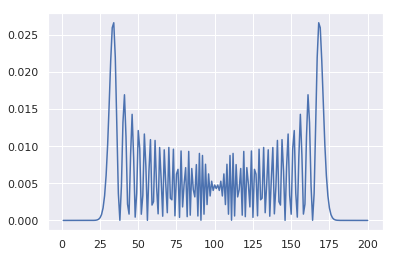

In [5]:
plt.plot(np.linspace(1, n, n), psi_t*np.conjugate(psi_t))

Then we can easily visualize how our quantum-walker behaves in graph $C_n$ given an initial state and a time t.